In [1]:
import numpy as np
import nifty

import matplotlib.pyplot as plt
%matplotlib inline
from importlib import reload
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import sys
sys.path.append('..')
import bayesian_causal_model
import bayesian_causal_model.bayesian_causal_sampling_numpy
from benchmark_utils import get_pair

/afs/mpa/data/maxk/miniconda3/envs/causality/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/afs/mpa/data/maxk/miniconda3/envs/causality/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/afs/mpa/data/maxk/miniconda3/envs/causality/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


### initialize the Bayesian Causal Sampler Instance with given Power Spectra for $\beta$ and $f$

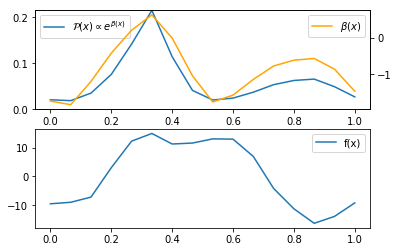

In [2]:
np.random.seed(20)
p_spec_beta = lambda q: 16/((q/1)**4 + 1)
p_spec_f = lambda q: 1e3/((q/1)**4 + 1)

bcs = bayesian_causal_model.bayesian_causal_sampling_numpy.BayesianCausalSampler(
    N_bins=16,
    power_spectrum_beta=p_spec_beta,
    power_spectrum_f=p_spec_f,
    noise_var=5e-2)

bcs.draw_sample_fields()

x = np.linspace(0, 1, bcs.N_bins)
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(x, bcs.p_x, label=r'$\mathcal{P}(x) \propto e^{\beta(x)}$')
ax1.legend(loc=2)
ax1.set_ylim(bottom=0, top=max(bcs.p_x))
ax1_2 = ax1.twinx()
ax1_2.plot(x, np.array(bcs.beta), c='orange', label=r'$\beta(x)$')
ax1_2.legend(loc=1)
ax2.plot(x, bcs.f, label='f(x)')
ax2.legend()


### draw x, y samples from the BCS

/afs/mpa/home/maxk/source/NIFTy/.eggs/scipy-1.1.0-py3.6-linux-x86_64.egg/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


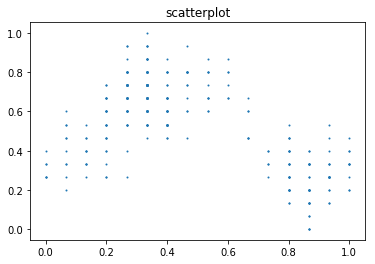

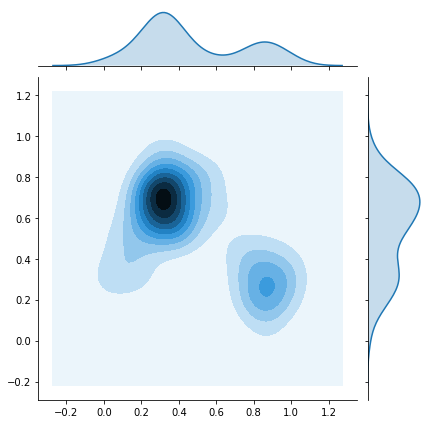

In [3]:
# take 300 samples
x, y = bcs.get_samples(300, discretize=1)
# scale both data samples to [0, 1] range
scaler = MinMaxScaler(feature_range=(0, 1))
x, y = scaler.fit_transform(np.array((x, y)).T).T
fig, ax= plt.subplots(1)
ax.scatter(x, y, s=1)
ax.set_title('scatterplot')
plot = sns.jointplot(x, y, kind="kde")

### generate 100 datasets on this way, with 300 samples each, and save them for benchmarking

In [9]:
# """ Uncomment cell to write data
p_spec_beta = lambda q: 1e6/((q/1)**4 + 1)
p_spec_f = lambda q: 1e6/((q/1)**4 + 1)

for i in range(100):
    np.random.seed(i)
    bcs = bayesian_causal_model.bayesian_causal_sampling.BayesianCausalSampler(
    power_spectrum_beta=p_spec_beta,
    power_spectrum_f=p_spec_f,
    noise_var=5e-2)
    
    x, y = bcs.get_samples(300)
    # flip x and y with probability 1/2
    flip = np.random.binomial(1, 0.5)
    if flip:
        x, y = y, x
    scaler = MinMaxScaler(feature_range=(0, 1))
    x, y = scaler.fit_transform(np.array((x, y)).T).T
    
    np.savetxt('../benchmarks/bcs/pair0{:03d}.txt'.format(i+1), np.array([x, y]).T, delimiter=' ')
    with open('../benchmarks/bcs/pairmeta.txt', 'a') as f:
        if not flip:
            f.write('0{:03d} 1 1 2 2 1\n'.format(i+1))
        else:
            f.write('0{:03d} 2 2 1 1 1\n'.format(i+1))

In [86]:
import scipy.stats
p_x_dist = scipy.stats.rv_discrete(values=(np.arange(1024), bcs.p_x_val))

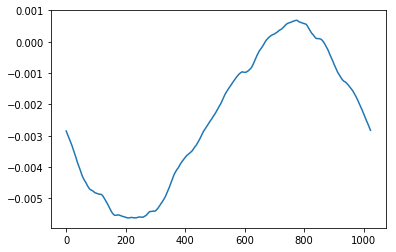

In [88]:
plt.plot(bcs.f_val)

In [71]:
k = np.random.poisson(lam=(bcs.p_x_val*300), size=(1024))

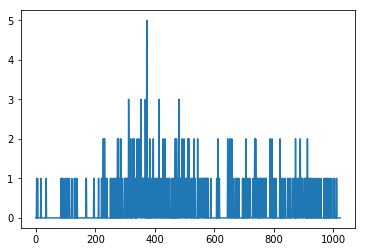

In [69]:
plt.plot(np.random.poisson(lam=(bcs.p_x_val*300), size=(1024)))

In [76]:
[i for i in range(1024) for _ in range(k[i])]

[2,
 14,
 24,
 32,
 33,
 36,
 37,
 46,
 47,
 50,
 51,
 59,
 60,
 68,
 75,
 76,
 88,
 90,
 97,
 102,
 104,
 105,
 116,
 121,
 124,
 125,
 129,
 160,
 163,
 191,
 197,
 213,
 215,
 226,
 226,
 228,
 230,
 235,
 236,
 237,
 238,
 242,
 243,
 249,
 253,
 257,
 259,
 262,
 267,
 268,
 270,
 271,
 278,
 282,
 283,
 285,
 288,
 296,
 296,
 297,
 299,
 314,
 314,
 320,
 326,
 332,
 335,
 338,
 338,
 346,
 346,
 346,
 346,
 348,
 349,
 349,
 352,
 354,
 354,
 355,
 357,
 360,
 361,
 363,
 364,
 366,
 367,
 369,
 372,
 373,
 375,
 375,
 377,
 378,
 385,
 387,
 388,
 388,
 388,
 389,
 391,
 392,
 392,
 395,
 395,
 399,
 401,
 401,
 404,
 409,
 413,
 415,
 415,
 417,
 419,
 419,
 423,
 423,
 423,
 425,
 426,
 428,
 429,
 429,
 433,
 436,
 437,
 437,
 440,
 441,
 441,
 442,
 446,
 450,
 455,
 456,
 468,
 468,
 473,
 474,
 477,
 478,
 478,
 478,
 480,
 481,
 483,
 485,
 488,
 488,
 493,
 498,
 502,
 504,
 510,
 515,
 516,
 518,
 519,
 521,
 522,
 526,
 526,
 535,
 535,
 539,
 540,
 541,
 545,
 547,
